In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
import os
import gffutils
import itertools
import numpy as np
import pandas as pd
from Bio import SeqIO
from scipy import stats
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio.SeqFeature import SeqFeature, FeatureLocation

In [3]:
phenotypes = {'deces': 'death',
 'choc': 'septic shock',
 'passage_en_rea': 'admission to ICU',
 'pe_urinaire': 'urinary tract',
 'pe_digestive': 'digestive tract'}

In [4]:
h_2 = []
for p in phenotypes:
    m = pd.read_csv(f'../out/associations/{p}/heritability.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'variants'
    m['dataset'] = 'full'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability_septicoli.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'variants'
    m['dataset'] = 'Septicoli'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability_colibafi.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'variants'
    m['dataset'] = 'Colibafi'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'variants'
    m['dataset'] = 'full'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability_lineages.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'phylogroup'
    m['dataset'] = 'full'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability_septicoli_lineages.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'phylogroup'
    m['dataset'] = 'Septicoli'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability_colibafi_lineages.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'phylogroup'
    m['dataset'] = 'Colibafi'
    h_2.append(m)
h_2 = pd.concat(h_2)

In [5]:
h = h_2[h_2['lik'] == 'normal'].melt(id_vars=['phenotype', 'set', 'dataset'])
h = h[h['variable'] != 'lik']

In [6]:
h

,phenotype,set,dataset,variable,value
35,death,variants,full,naive,0.0
36,death,variants,Septicoli,naive,0.0
37,death,variants,Colibafi,naive,0.0
38,death,variants,full,naive,0.0
39,death,phylogroup,full,naive,0.0
...,...,...,...,...,...
100,digestive tract,variants,Colibafi,with covariates,0.146494
101,digestive tract,variants,full,with covariates,0.105202
102,digestive tract,phylogroup,full,with covariates,0.052547
103,digestive tract,phylogroup,Septicoli,with covariates,0.03269


In [7]:
h['label'] = [f'{x} + covariates'
              if y == 'with covariates'
              else f'{x}'
              for x, y in h[['set', 'variable']].values]

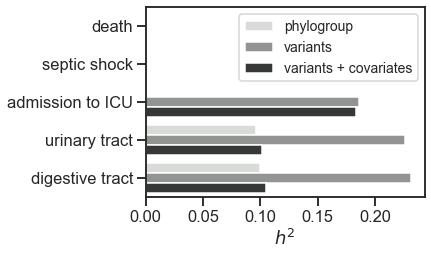

In [8]:
plt.figure(figsize=(5, 3.5))

sns.barplot(data=h[h['dataset'] == 'full'],
            y='phenotype',
            x='value',
            hue='label',
            hue_order=['phylogroup', 'variants', 'variants + covariates'],
            palette=['xkcd:light grey', 'xkcd:grey', 'xkcd:dark grey'])

plt.xlabel('$h^2$')
plt.ylabel('')
plt.legend(loc='upper right',
           fontsize=14,
           facecolor='white')

plt.savefig('heritability.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('heritability.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

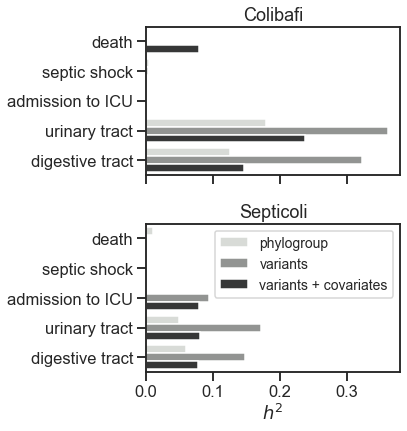

In [9]:
cp = sns.catplot(data=h[h['dataset'] != 'full'],
                 kind='bar',
                 y='phenotype',
                 x='value',
                 hue='label',
                 row='dataset',
                 height=3,
                 aspect=2,
                 row_order=['Colibafi', 'Septicoli'],
                 hue_order=['phylogroup', 'variants', 'variants + covariates'],
                 palette=['xkcd:light grey', 'xkcd:grey', 'xkcd:dark grey'],
                 legend=None
                )

cp.set_titles(row_template='{row_name}')
cp.set_xlabels('$h^2$')
cp.set_ylabels('')
sns.despine(top=False,
            right=False)
plt.legend(loc='upper right',
           fontsize=14,
           facecolor='white')

plt.savefig('heritability_studies.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('heritability_studies.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

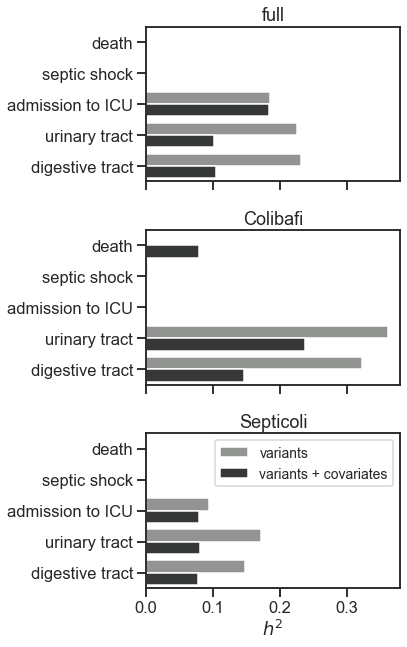

In [24]:
cp = sns.catplot(data=h,
                 kind='bar',
                 y='phenotype',
                 x='value',
                 hue='label',
                 row='dataset',
                 height=3,
                 aspect=2,
                 row_order=['full', 'Colibafi', 'Septicoli'],
                 hue_order=['variants', 'variants + covariates'],
                 palette=['xkcd:grey', 'xkcd:dark grey'],
                 legend=None)

cp.set_titles(row_template='{row_name}')
cp.set_xlabels('$h^2$')
cp.set_ylabels('')
sns.despine(top=False,
            right=False)
plt.legend(loc='upper right',
           fontsize=14,
           facecolor='white')

plt.savefig('heritability_all.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('heritability_all.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [11]:
res = []
for pheno in phenotypes:
    u = pd.read_csv(f'../out/associations/{pheno}/unitigs_filtered.tsv')
    g = pd.read_csv(f'../out/associations/{pheno}/gpa_filtered.tsv')
    s = pd.read_csv(f'../out/associations/{pheno}/struct_filtered.tsv')
    res.append((phenotypes[pheno],
                'lmm',
                'with covariates',
                u.shape[0],
                g.shape[0],
                s.shape[0]))
    u = pd.read_csv(f'../out/associations/{pheno}/nc_unitigs_filtered.tsv')
    g = pd.read_csv(f'../out/associations/{pheno}/nc_gpa_filtered.tsv')
    s = pd.read_csv(f'../out/associations/{pheno}/nc_struct_filtered.tsv')
    res.append((phenotypes[pheno],
                'lmm',
                'naïve',
                u.shape[0],
                g.shape[0],
                s.shape[0]))
    u = pd.read_csv(f'../out/associations/{pheno}/lg_unitigs_filtered.tsv')
    g = pd.read_csv(f'../out/associations/{pheno}/lg_gpa_filtered.tsv')
    s = pd.read_csv(f'../out/associations/{pheno}/lg_struct_filtered.tsv')
    res.append((phenotypes[pheno],
                'fixed',
                'with covariates',
                u.shape[0],
                g.shape[0],
                s.shape[0]))
r = pd.DataFrame(res,
                 columns=['phenotype', 'type', 'set',
                          'unitigs', 'gene presence absence', 'structural variants'])

In [12]:
r

,phenotype,type,set,unitigs,gene presence absence,structural variants
0,death,lmm,with covariates,0,0,0
1,death,lmm,naïve,0,0,0
2,death,fixed,with covariates,0,0,0
3,septic shock,lmm,with covariates,0,0,0
4,septic shock,lmm,naïve,2,2,0
5,septic shock,fixed,with covariates,0,0,0
6,admission to ICU,lmm,with covariates,1,0,1
7,admission to ICU,lmm,naïve,1,0,2
8,admission to ICU,fixed,with covariates,8,0,1
9,urinary tract,lmm,with covariates,593,14,3


In [13]:
r = r.melt(id_vars=['phenotype', 'type', 'set'])

In [14]:
r.columns = ['phenotype', 'type', 'set', 'variant type', 'variants']
r['ln(variants)'] = r['variants'] + 1

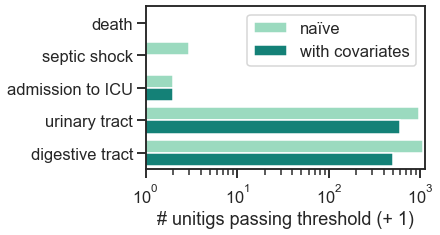

In [15]:
plt.figure(figsize=(5, 3))
sns.barplot(data=r[(r['type'] == 'lmm') & (r['variant type'] == 'unitigs')], 
            x='ln(variants)', y='phenotype', hue='set',
            hue_order=['naïve', 'with covariates'],
            palette=['xkcd:light teal',
                     'xkcd:teal'])
plt.xlim(1)
plt.ylabel('')
plt.xlabel('# unitigs passing threshold (+ 1)')

plt.legend(facecolor='w')

plt.xscale('log')

plt.savefig('unitigs.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('unitigs.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [16]:
res = []
for pheno in phenotypes:
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/unitigs_filtered.tsv',
                        index_col=0, sep='\t')
        g1 = u.index
    except:
        g1 = set()
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/nc_unitigs_filtered.tsv',
                        index_col=0, sep='\t')
        g2 = u.index
    except:
        g2 = set()
    try:
        p = len(g1.intersection(g2)) / min([len(g1), len(g2)])
    except:
        p = 0
    print(pheno, len(g1), len(g2), len(g1.intersection(g2)),
          p)

deces 0 0 0 0
choc 0 2 0 0
passage_en_rea 1 1 1 1.0
pe_urinaire 593 975 560 0.9443507588532883
pe_digestive 498 1061 493 0.9899598393574297


In [17]:
res = []
for pheno in phenotypes:
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/summary.tsv')
        shape = u.shape[0]
    except:
        shape = 0
    res.append((phenotypes[pheno],
                'lmm',
                'with covariates',
                shape))
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/nc_summary.tsv')
        shape = u.shape[0]
    except:
        shape = 0
    res.append((phenotypes[pheno],
                'lmm',
                'naïve',
                shape))
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/lg_summary.tsv')
        shape = u.shape[0]
    except:
        shape = 0
    res.append((phenotypes[pheno],
                'fixed',
                'with covariates',
                shape))
r = pd.DataFrame(res,
                 columns=['phenotype', 'type', 'set',
                          'genes'])

In [18]:
r

,phenotype,type,set,genes
0,death,lmm,with covariates,0
1,death,lmm,naïve,0
2,death,fixed,with covariates,0
3,septic shock,lmm,with covariates,0
4,septic shock,lmm,naïve,0
5,septic shock,fixed,with covariates,0
6,admission to ICU,lmm,with covariates,0
7,admission to ICU,lmm,naïve,0
8,admission to ICU,fixed,with covariates,2
9,urinary tract,lmm,with covariates,32


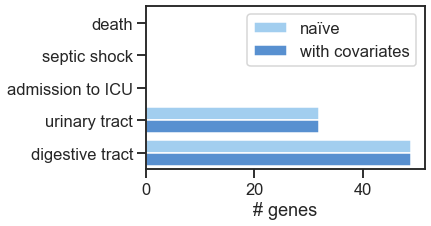

In [19]:
plt.figure(figsize=(5, 3))
sns.barplot(data=r[r['type'] == 'lmm'],
            x='genes', y='phenotype', hue='set',
            hue_order=['naïve', 'with covariates'],
            palette=['xkcd:light blue',
                     'xkcd:dark sky blue'])
# plt.xlim(1)
plt.ylabel('')
plt.xlabel('# genes')

plt.legend(facecolor='w')

plt.savefig('genes.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('genes.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [20]:
res = []
for pheno in phenotypes:
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/summary.tsv',
                        sep='\t', index_col=0)
        g1 = u.index
        u['set'] = 'with covariates'
        u['phenotype'] = pheno
        u['p'] = -np.log10(u['avg-lrt-pvalue'])
        res.append(u)
    except:
        g1 = set()
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/nc_summary.tsv',
                        sep='\t', index_col=0)
        g2 = u.index
        u['set'] = 'naïve'
        u['phenotype'] = pheno
        u['p'] = -np.log10(u['avg-lrt-pvalue'])
        res.append(u)
    except:
        g2 = set()
    print(pheno, len(g1), len(g2), len(g1.intersection(g2)))
r = pd.concat(res)

deces 0 0 0
choc 0 0 0
passage_en_rea 0 0 0
pe_urinaire 32 32 32
pe_digestive 49 49 49


In [21]:
r = r[(r['phenotype'].isin(['pe_urinaire', 'pe_digestive'])) &
      (r['set'] == 'with covariates')]

In [22]:
puri = r[r['phenotype'] == 'pe_urinaire'].index
pdige = r[r['phenotype'] == 'pe_digestive'].index
both = puri.intersection(pdige)

In [23]:
len(puri), len(pdige), len(both)

(32, 49, 25)

In [24]:
r['pheno'] = ['both' if x in both
              else 'single'
              for x in r.index]

In [25]:
r['gene'] = ['pap operon' if 'pap' in x
             else 'other'
             for x in r.index]

In [26]:
r['avg-odds-ratio'] = np.power(2, r['avg-beta'])

In [27]:
r['entry'] = ['urinary tract' if 'urinaire' in x
              else 'digestive tract'
              for x in r['phenotype'].values]

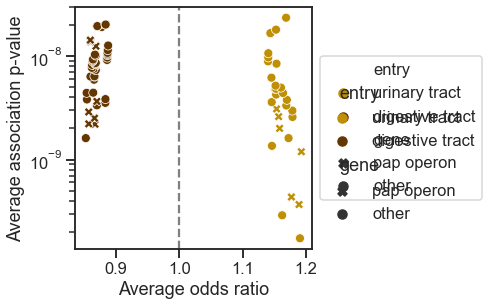

In [28]:
sns.relplot(data=r, hue='entry',
            style='gene',
            x='avg-odds-ratio', y='avg-lrt-pvalue',
            height=4.5,
            palette=['#bf9005', '#653700'],
            style_order=['pap operon', 'other'],
            markers=['X', 'o'])
plt.legend(facecolor='w',
           loc='center left',
           bbox_to_anchor=(1, 0.5))
plt.yscale('log')
plt.xlabel('Average odds ratio')
plt.ylabel('Average association p-value')
plt.axvline(1, ls='dashed', color='grey')
sns.despine(top=False, right=False)

plt.savefig('hits.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('hits.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

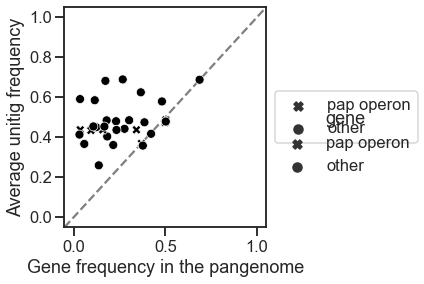

In [29]:
sns.relplot(data=r[r['entry'] == 'urinary tract'],
            style='gene',
            x='pangenome-frequency', y='avg-af',
            height=4, aspect=1,
            style_order=['pap operon', 'other'],
            markers=['X', 'o'],
            color='k')

plt.plot([-0.05, 1.05],
         [-0.05, 1.05],
         ls='dashed', color='grey',
         zorder=-1)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.legend(facecolor='w',
           loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.xlabel('Gene frequency in the pangenome')
plt.ylabel('Average unitig frequency')
sns.despine(top=False, right=False)

plt.savefig('hits_frequency.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('hits_frequency.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [30]:
r1 = r.loc[both]

In [31]:
r1 = r1[['phenotype', 'avg-odds-ratio']].reset_index().pivot_table(index='gene',
                                                                   columns='phenotype',
                                                                   values='avg-odds-ratio')
r1 = r1.fillna(0)

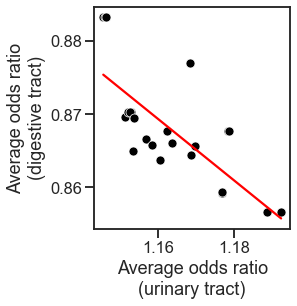

In [32]:
sns.relplot(data=r1,
            x='pe_urinaire',
            y='pe_digestive',
            height=4, aspect=1,
            color='k',
            legend=None)

lr = stats.linregress(r1['pe_urinaire'], r1['pe_digestive'])

x = np.array([r1['pe_urinaire'].min(), r1['pe_urinaire'].max()])

plt.plot(x,
         lr.slope * x + lr.intercept,
         'r-')

plt.xlabel('Average odds ratio\n(urinary tract)')
plt.ylabel('Average odds ratio\n(digestive tract)')
sns.despine(top=False, right=False)

plt.savefig('hits_both.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('hits_both.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [33]:
lr

LinregressResult(slope=-0.4166488901578978, intercept=1.3526220114502934, rvalue=-0.7549252555026817, pvalue=1.2943590860995523e-05, stderr=0.07547114657828688, intercept_stderr=0.087800775058567)

In [34]:
sorted(r[r['pheno'] == 'both'].index)

['group_11028',
 'group_11028',
 'group_11699',
 'group_11699',
 'group_12528',
 'group_12528',
 'group_13469',
 'group_13469',
 'group_14188',
 'group_14188',
 'group_14204',
 'group_14204',
 'group_14883',
 'group_14883',
 'group_3851',
 'group_3851',
 'group_8758',
 'group_8758',
 'group_8928',
 'group_8928',
 'intA_3~~~intA_2~~~intS_2~~~intS_4~~~intS_1~~~~~~intA_5~~~intA_7~~~intA_1~~~intS_3~~~intA_4~~~intA_6~~~intS_6~~~intS',
 'intA_3~~~intA_2~~~intS_2~~~intS_4~~~intS_1~~~~~~intA_5~~~intA_7~~~intA_1~~~intS_3~~~intA_4~~~intA_6~~~intS_6~~~intS',
 'intS_3~~~intA_1~~~intA_7~~~intS_4~~~intA_6~~~intA_3~~~intS_1~~~intA_5~~~~~~intS_2~~~intA_4',
 'intS_3~~~intA_1~~~intA_7~~~intS_4~~~intA_6~~~intA_3~~~intS_1~~~intA_5~~~~~~intS_2~~~intA_4',
 'intS_3~~~intA~~~intA_7~~~intA_2~~~~~~intA_4~~~intA_1~~~intA_5~~~intS_2~~~intS~~~intA_3~~~intS_5~~~intS_1',
 'intS_3~~~intA~~~intA_7~~~intA_2~~~~~~intA_4~~~intA_1~~~intA_5~~~intS_2~~~intS~~~intA_3~~~intS_5~~~intS_1',
 'opgE_1~~~opgE_2~~~opgE_3~~~opgE_4',


In [35]:
s = pd.read_csv('../out/associations/pe_urinaire/summary.tsv', sep='\t', index_col=0)

In [36]:
pap = {x for x in s.index
       if x.startswith('pap')}

In [37]:
opgE = {x for x in s.index
        if x.startswith('opgE')}

In [38]:
p = pd.read_csv('../out/panaroo/gene_presence_absence_roary.csv', sep=',', index_col=0, low_memory=False)

In [39]:
p = p.drop(columns=p.columns[:13])

In [40]:
pap_genes = {}
for strain, genes in p.loc[pap].apply(lambda x: {y for g in x.values if str(g) != 'nan' for y in g.split(';')}).iteritems():
    hits = set(p.loc[s.index, strain].dropna().values)
    if len(hits.intersection(genes)) == 0:
        pap_genes[strain] = set()
        continue
    pap_genes[strain] = hits.intersection(genes)

In [41]:
opgE_genes = {}
for strain, genes in p.loc[opgE].apply(lambda x: {y for g in x.values if str(g) != 'nan' for y in g.split(';')}).iteritems():
    hits = set(p.loc[s.index, strain].dropna().values)
    if len(hits.intersection(genes)) == 0:
        opgE_genes[strain] = set()
        continue
    opgE_genes[strain] = hits.intersection(genes)

In [42]:
flags = {}
res = []
for strain in p.columns:
    if len(pap_genes[strain]) == 0 and len(opgE_genes[strain]) == 0:
#         print(f'{strain} neither')
        pass
    elif len(pap_genes[strain]) == 0:
#         print(f'{strain} no pap')
        pass
    elif len(opgE_genes[strain]) == 0:
#         print(f'{strain} no opgE')
        pass
    else:
        flags[strain] = set()
        seqs = {x.id: len(x) for x in SeqIO.parse(f'../data/fixed_fastas/{strain}.fasta',
                                                  'fasta')}
        gff = gffutils.create_db(f'../data/gffs/{strain}.gff', ':memory:')
        for g1, g2 in itertools.product(pap_genes[strain],
                                        opgE_genes[strain]):
            try:
                gene1 = gff[g1]
                gene2 = gff[g2]
            except:
                continue
            
            if gene1.chrom != gene2.chrom:
                dist = min([gene1.start, seqs[gene1.chrom] - gene1.stop])
                res.append((strain, 'diff. contig', dist))
                if dist > 10000:
                    flags[strain].add(f'diff. contig - far {dist}')
                else:
                    flags[strain].add(f'diff. contig {dist}')
            else:
                dist = min([abs(x-y) for x, y in itertools.product([gene1.start,
                                                                gene1.stop],
                                                               [gene2.start,
                                                                gene2.stop])])
                res.append((strain, 'same contig', dist))
                if dist > 15000:
                    flags[strain].add(f'same contig - far {dist}')
                else:
                    flags[strain].add(f'same contig - close {dist}')
        flags_str = ' / '.join(sorted(flags[strain]))
#         print(f'{strain} {flags_str}')
r = pd.DataFrame(res, columns=['strain', 'type', 'distance'])

In [43]:
n = r.groupby(['type', 'strain'])['distance'].max().reset_index()

In [44]:
r.groupby('type')['strain'].nunique()

type
diff. contig    213
same contig     118
Name: strain, dtype: int64

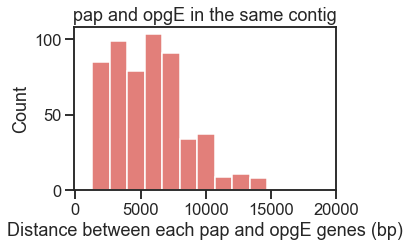

In [45]:
sns.displot(data=r[(r['type'] == 'same contig') &
                   (r['distance'] < 50000)],
            x='distance', kind='hist', height=3.5,
            aspect=1.5, bins=10, color='xkcd:pale red')
plt.title('pap and opgE in the same contig')
plt.xlabel('Distance between each pap and opgE genes (bp)')
plt.xlim(-100, 20000)

sns.despine(right=False, top=False)

plt.savefig('distance_same.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('distance_same.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

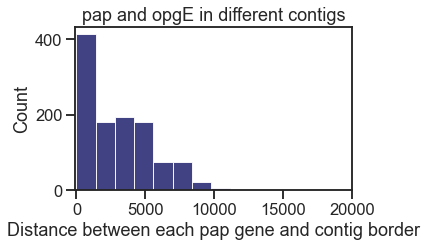

In [46]:
sns.displot(data=r[(r['type'] == 'diff. contig') &
                   (r['distance'] < 50000)],
            x='distance', kind='hist', height=3.5,
            aspect=1.5, bins=30, color='xkcd:dark blue')
plt.title('pap and opgE in different contigs')
plt.xlabel('Distance between each pap gene and contig border')
plt.xlim(-100, 20000)
sns.despine(right=False, top=False)

plt.savefig('distance_diff.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('distance_diff.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [47]:
r[r['type'] == 'same contig'].sort_values('distance')

,strain,type,distance
1235,R1B1B12,same contig,1281
1459,R1B5H8,same contig,1281
531,H1-003-0066-D-R,same contig,1281
1157,R1B1A6,same contig,1281
417,H1-002-0075-S-Y,same contig,1281
...,...,...,...
751,H1-005-0007-B-J,same contig,14713
1053,H1-007-0035-S-G,same contig,155052
1049,H1-007-0035-S-G,same contig,158393
1055,H1-007-0035-S-G,same contig,159198


In [48]:
r[r['type'] == 'diff. contig'].sort_values('distance')

,strain,type,distance
123,H1-001-0084-A-S,diff. contig,2
1195,R1B1E8,diff. contig,2
1206,R1B1B10,diff. contig,3
1316,R1B3A1,diff. contig,3
338,H1-002-0034-C-Z,diff. contig,6
...,...,...,...
879,H1-006-0002-F-L,diff. contig,37041
871,H1-006-0002-F-L,diff. contig,38670
877,H1-006-0002-F-L,diff. contig,40382
873,H1-006-0002-F-L,diff. contig,41187


In [49]:
strains = set(r[r['type'] == 'same contig']['strain'].unique())

In [50]:
try:
    os.mkdir('genes')
except:
    pass

In [51]:
pg = pd.read_csv('../data/Strain_typing.csv', sep=',')

In [52]:
for phylo in sorted(pg[pg['Strain'].isin(strains)]['Phylogroup'].unique()):
    print(phylo, sorted(pg[(pg['Strain'].isin(strains)) &
                           (pg['Phylogroup'] == phylo)]['Strain'].values))

A ['H1-006-0014-H-P', 'R1B6E6', 'R1B6F7']
B1 ['H1-001-0010-R-N', 'R1B6I11']
B2 ['H1-001-0011-M-Y', 'H1-001-0014-F-H', 'H1-001-0033-G-M', 'H1-001-0050-M-T', 'H1-001-0069-L-A', 'H1-001-0079-V-O', 'H1-001-0082-P-K', 'H1-001-0083-D-D', 'H1-001-0085-F-D', 'H1-001-0098-B-K', 'H1-001-0101-D-A', 'H1-001-0138-N-F', 'H1-001-0140-M-O', 'H1-001-0141-G-Y', 'H1-001-0157-P-A', 'H1-002-0001-M-C', 'H1-002-0005-B-J', 'H1-002-0037-M-F', 'H1-002-0068-R-E', 'H1-002-0073-C-C', 'H1-002-0074-R-S', 'H1-002-0075-S-Y', 'H1-003-0026-R-A', 'H1-003-0032-M-L', 'H1-003-0049-H-A', 'H1-003-0056-S-G', 'H1-003-0066-D-R', 'H1-003-0085-C-J', 'H1-003-0089-N-A', 'H1-003-0095-L-C', 'H1-003-0102-N-F', 'H1-003-0122-K-R', 'H1-004-0005-J-I', 'H1-004-0006-D-E', 'H1-004-0032-M-R', 'H1-004-0033-B-M', 'H1-004-0038-D-S', 'H1-004-0039-M-M', 'H1-005-0011-B-M', 'H1-005-0017-S-M', 'H1-005-0020-C-M', 'H1-005-0036-K-J', 'H1-005-0044-R-A', 'H1-006-0002-F-L', 'H1-006-0017-B-Y', 'H1-006-0019-C-M', 'H1-006-0026-L-L', 'H1-006-0028-D-J', 'H1-007-

In [53]:
for strain in strains:
    print(strain)
    gff = gffutils.create_db(f'../data/gffs/{strain}.gff', ':memory:')

    genes = sorted(pap_genes[strain].union(opgE_genes[strain]))

    # check if there's more than one chromosome here
    # pick the one with the most genes
    chroms = [gff[x].seqid for x in genes]
    if len(set(chroms)) > 1:
        dc = {x: chroms.count(x)
              for x in set(chroms)}
        chrom = sorted(dc, key=lambda x: dc[x])[-1]
        genes = [x for x in genes
                 if gff[x].seqid == chrom]
    else:
        chrom = gff[genes[0]].seqid
    start = min([gff[x].start for x in genes])
    end = max([gff[x].end for x in genes])

    start -= 5000
    end += 5000
    if start < 0:
        start = 0

    region = gff.region(f'{chrom}:{start}-{end}')
    gd = GenomeDiagram.Diagram('associated')
    track = gd.new_track(1,
                         name=f'{strain}',
                         greytrack=True)
    features = track.new_set()

    pmin = None
    pmax = None

    hits = set(p.loc[s.index, strain].dropna().values)

    for f in region:
        if f.featuretype != 'gene':
            continue
        locus = f.attributes['ID'][0].replace('_gene', '')
        gmin = int(f.start)
        gmax = int(f.end)
        if pmin is None or gmin < pmin:
            pmin = gmin
        if pmax is None or gmax > pmax:
            pmax = gmax
        if f.strand == '+':
            fl = FeatureLocation(f.start, f.end, strand=1)
        else:
            fl = FeatureLocation(f.start, f.end, strand=-1)
        sf = SeqFeature(location=fl,
                        type=f.featuretype)
        if locus in hits:
            color = 'blue'
        else:
            color = 'grey'
        features.add_feature(sf,
                             label=True,
                             name=f.attributes.get('Name', [locus])[0],
                             color=color,
                             label_size=5,
                             label_angle=90,
                             label_position='middle',
                             sigil='ARROW',
                             arrowshaft_height=0.5)
    gd.draw(format='linear',
            fragments=1,
            orientation='landscape',
            start=pmin, end=pmax,
            pagesize=(((pmax - pmin)/1000)*cm, 3*cm))
    gd.write(f'genes/{strain}.svg', 'SVG')

H1-007-0039-H-A
H1-002-0055-L-M
H1-007-0040-B-Y
H1-001-0143-B-M
R1B4F3
R1B3F5
H1-004-0006-D-E
H1-002-0068-R-E
H1-007-0009-T-R
R1B6F4
R1B1J13
H1-006-0017-B-Y
R1B5D5
H1-002-0045-V-M
H1-002-0005-B-J
H1-001-0089-F-A
R1B3E4
R1B13C8
H1-005-0007-B-J
R1B1I12
H1-007-0012-A-V
R1B6A19
R1B13G9
H1-003-0089-N-A
H1-006-0019-C-M
H1-006-0004-F-M
H1-005-0011-B-M
H1-004-0032-M-R
H1-001-0006-M-A
R1B1A6
R1B15C2
R1B5A11
H1-003-0022-D-M
H1-003-0056-S-G
H1-005-0044-R-A
H1-002-0074-R-S
R1B1B12
H1-003-0074-F-B
H1-003-0026-R-A
H1-002-0037-M-F
R1B1F1
R1B6I3
R1B6J9
H1-001-0157-P-A
H1-003-0085-C-J
H1-005-0045-G-C
R1B6E6
H1-001-0014-F-H
R1B6I11
R1B1I8
H1-001-0011-M-Y
H1-001-0098-B-K
R1B1H6
H1-001-0140-M-O
H1-003-0066-D-R
R1B1A3
H1-003-0032-M-L
H1-006-0002-F-L
R1B2C11
H1-004-0034-B-S
R1B1C3
R1B1F10
R1B1E15
H1-001-0138-N-F
H1-005-0020-C-M
H1-004-0005-J-I
H1-001-0100-H-O
H1-007-0032-B-M
H1-004-0033-B-M
R1B2A4
R1B6H13
H1-004-0024-M-R
H1-001-0141-G-Y
H1-003-0049-H-A
H1-004-0039-M-M
H1-005-0036-K-J
H1-003-0122-K-R
H1-001-